sorry i didn't have time to annotate this one :( :( :(

In [112]:
import pandas as pd
import numpy as np

In [61]:
df = pd.read_csv("./NYC_Dog_Licensing_Dataset.csv")

a bit of "cleaning" to make it easier to draw graphs and stuff. this "cleaning" ends up selecting only about 10% of the rows, whoops

In [62]:
df.dropna(inplace=True) # remove rows with empty fields

In [63]:
# only dogs with names
df = df[~(df["AnimalName"].isin(["UNKNOWN", "NAME NOT PROVIDED", "NAME", "NONE", "NOT", "UNKNOWED", "."]))]

In [64]:
df["ZipCode"] = df["ZipCode"].astype(int) # convert zipcode field to integer

In [65]:
# only include dogs who were born in the same year (or later) as their license issue
df = df[df['AnimalBirthYear'].astype(str) >= df['LicenseIssuedDate'].str.slice(6)].copy()

In [66]:
# add field for years since birth
df['YearsSinceBirth'] = 2022 - df['AnimalBirthYear']

just so we have something else to graph

In [67]:
# add field for name length
df['NameLength'] = df['AnimalName'].str.len()

In [71]:
df

,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year,YearsSinceBirth,NameLength
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,10035,09/12/2014,09/12/2017,2016,8,5
2,ALI,M,2014,Basenji,10013,09/12/2014,09/12/2019,2016,8,3
12,LUCY,F,2014,Dachshund Smooth Coat Miniature,11215,09/13/2014,09/13/2019,2016,8,4
13,RICKY,M,2014,German Shepherd Dog,11220,09/13/2014,09/13/2017,2016,8,5
18,AVERY,F,2014,American Pit Bull Terrier/Pit Bull,10002,09/13/2014,09/13/2019,2016,8,5
...,...,...,...,...,...,...,...,...,...,...
507292,KATSU,F,2021,Pembroke Welsh Corgi,11361,12/31/2021,12/31/2022,2022,1,5
507293,LUFF,M,2021,Rottweiler,11365,12/31/2021,12/31/2022,2022,1,4
507295,SALVANO,F,2021,Pomeranian,11223,12/31/2021,12/31/2022,2022,1,7
507297,HUDSON,M,2021,Pembroke Welsh Corgi,10314,12/31/2021,12/31/2022,2022,1,6


<Axes: >

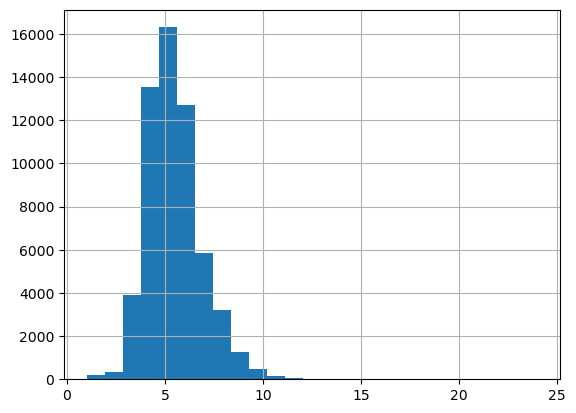

In [68]:
df['NameLength'].hist(bins=25)

In [72]:
df['AnimalName'].value_counts()[:20]

AnimalName
LUNA       699
BELLA      579
MAX        459
MILO       442
CHARLIE    417
COCO       414
TEDDY      411
LOLA       327
ROCKY      290
LEO        288
LUCY       262
COOPER     260
DAISY      251
OLIVER     249
BAILEY     244
PENNY      209
TOBY       205
MIA        204
BENJI      200
CHLOE      197
Name: count, dtype: int64

In [94]:
def popular_names_by_year(year, count=10):
    df[df["AnimalBirthYear"] == year]["AnimalName"].value_counts()[:count].plot(kind="barh")

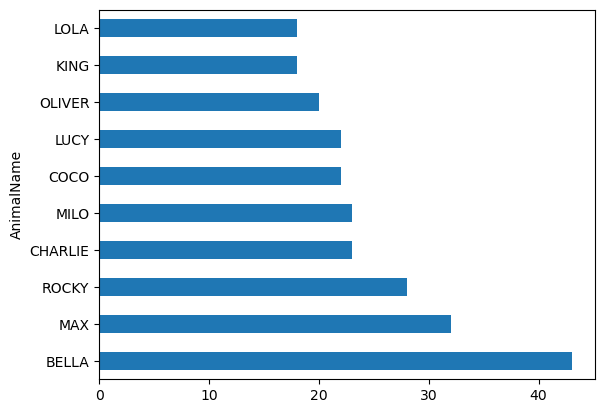

In [95]:
popular_names_by_year(2015, 10)

## Basics of ipython widgets

[full list of widgets](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#selection-widgets)

In [160]:
from ipywidgets import interact, interact_manual, IntSlider, FloatSlider, Dropdown, Text, TagsInput

In [118]:
def show_sin(x):
    print(np.sin(x))

In [119]:
show_sin(4)

-0.7568024953079282


In [123]:
interact(show_sin, x=FloatSlider(min=0, max=50, step=0.005))

interactive(children=(FloatSlider(value=0.0, description='x', max=50.0, step=0.005), Output()), _dom_classes=(…

<function __main__.show_sin(x)>

In [142]:
def plot_sin(x):
    df = pd.DataFrame({"x": [x], "sin": [np.sin(x)]})
    print(df)
    df.plot.scatter(x="x", y="sin", ylim=(-1, 1))

     x       sin
0  0.6  0.564642


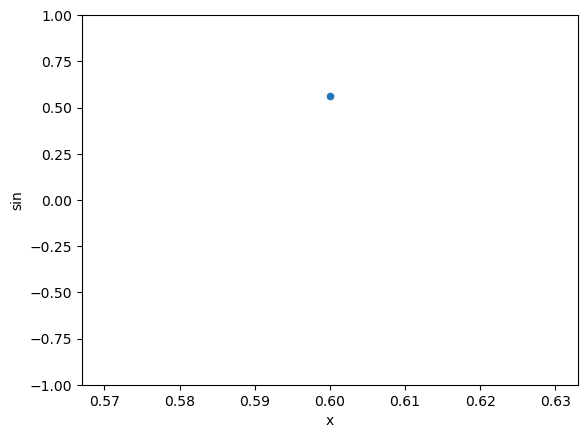

In [143]:
plot_sin(0.6)

In [148]:
interact(plot_sin, x=FloatSlider(min=0, max=10, step=0.01, continuous_update=False))

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='x', max=10.0, step=0.01), O…

<function __main__.plot_sin(x)>

example with an actual pandas dataframe

In [150]:
interact(popular_names_by_year,
                    year=IntSlider(
                        min=df["AnimalBirthYear"].min(),
                        max=df["AnimalBirthYear"].max()),
                    count=IntSlider(min=1, max=20, value=10))

interactive(children=(IntSlider(value=2014, description='year', max=2021, min=2014), IntSlider(value=10, descr…

<function __main__.popular_names_by_year(year, count=10)>

In [162]:
def popular_breeds_by_zip(zipcode, count=10):
    df[df['ZipCode'] == int(zipcode)]['BreedName'].value_counts()[:10].plot(kind="barh")

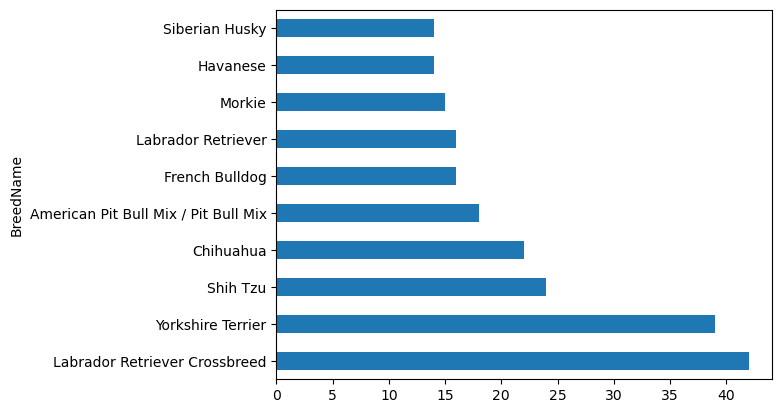

In [163]:
popular_breeds_by_zip(11221)

In [166]:
interact_manual(popular_breeds_by_zip, zipcode=Text(), count=IntSlider(min=1, max=20, value=10))

/var/folders/8r/3pg241bn1kvbv_hgjl31dyz00000gp/T/ipykernel_43567/3409099989.py:1: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  interact_manual(popular_breeds_by_zip, zipcode=Text(), count=IntSlider(min=1, max=20, value=10))


interactive(children=(Text(value='', description='zipcode'), IntSlider(value=10, description='count', max=20, …

<function __main__.popular_breeds_by_zip(zipcode, count=10)>

In [176]:
def name_length_histogram_by_breed(breeds):
    df[df["BreedName"].isin(breeds)].hist(column="NameLength", bins=25)

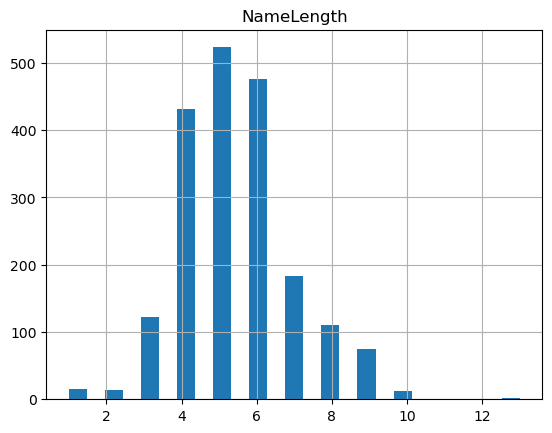

In [178]:
name_length_histogram_by_breed(["Beagle", "Chihuahua"])

In [185]:
interact(name_length_histogram_by_breed,
         breeds=TagsInput(value=['Chihuahua'], allowed_tags=list(df['BreedName'].unique()), allow_duplicates=False))

interactive(children=(TagsInput(value=['Chihuahua'], allow_duplicates=False, allowed_tags=['American Pit Bull …

<function __main__.name_length_histogram_by_breed(breeds)>

## pygwalker! it's neat

In [186]:
%pip install pygwalker

  Obtaining dependency information for pygwalker from https://files.pythonhosted.org/packages/e7/a6/bbf8808a86e9f306f640425a383327a9fb0611c085e34b7de213bd873a92/pygwalker-0.3.16-py3-none-any.whl.metadata
  Obtaining dependency information for arrow from https://files.pythonhosted.org/packages/f8/ed/e97229a566617f2ae958a6b13e7cc0f585470eac730a73e9e82c32a3cdd2/arrow-1.3.0-py3-none-any.whl.metadata
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Obtaining dependency information for duckdb==0.9.2 from https://files.pythonhosted.org/packages/32/2d/63769dcd6a35e639a7a3e0a8e9f14a14c180cc31605d62b9d283098ab2d8/duckdb-0.9.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for gw-dsl-parser==0.1.8a0 from https://files.pythonhosted.org/packages/e9/68/e63c389b8dd0d0bc5a382c27acab60263f2b9be67986a28b56c746920d6c/gw_dsl_parser-0.1.8a0-py3-none-any.whl.metadata
  Obtaining dependency information for pyarrow from https://files.pythonhosted.org/packages/1d/a6/b33

  Obtaining dependency information for annotated-types>=0.4.0 from https://files.pythonhosted.org/packages/28/78/d31230046e58c207284c6b2c4e8d96e6d3cb4e52354721b944d3e1ee4aa5/annotated_types-0.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for pydantic-core==2.14.5 from https://files.pythonhosted.org/packages/12/00/bd693e0bf24fa016c7194ac9ca671903b0938a5aa2603f7b5779070a15a0/pydantic_core-2.14.5-cp311-cp311-macosx_10_7_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 7.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 7.4 MB/s eta 0:00:0000:0100:01m
Using cached arrow-1.3.0-py3-none-any.whl (66 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 9.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/38

In [187]:
import pygwalker as pyg

In [188]:
pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

Box(children=(HTML(value='<div id="ifr-pyg-1" style="height: auto">\n    <head>\n        <meta http-equiv="Con…


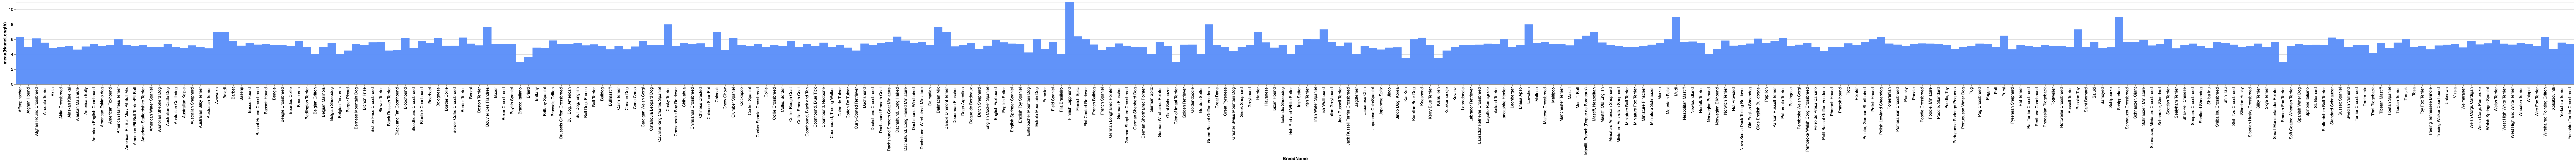

In [189]:
vis_spec = r"""{"config":"[{\"config\":{\"defaultAggregated\":true,\"geoms\":[\"rect\"],\"coordSystem\":\"generic\",\"limit\":-1},\"encodings\":{\"dimensions\":[{\"dragId\":\"gw_v957\",\"fid\":\"GW_1YOECG5E3DKNDWHZZG0\",\"name\":\"AnimalName\",\"basename\":\"AnimalName\",\"semanticType\":\"nominal\",\"analyticType\":\"dimension\"},{\"dragId\":\"gw_FveQ\",\"fid\":\"GW_2RA0W3PZQWVWC0QUWH5CFK\",\"name\":\"AnimalGender\",\"basename\":\"AnimalGender\",\"semanticType\":\"nominal\",\"analyticType\":\"dimension\"},{\"dragId\":\"gw_6nz5\",\"fid\":\"GW_RJNXQHYNYI0JMMEC7FGGEL4HM8\",\"name\":\"AnimalBirthYear\",\"basename\":\"AnimalBirthYear\",\"semanticType\":\"ordinal\",\"analyticType\":\"dimension\"},{\"dragId\":\"gw_Fq8M\",\"fid\":\"GW_A3CY02PLR7LKGWX0W\",\"name\":\"BreedName\",\"basename\":\"BreedName\",\"semanticType\":\"nominal\",\"analyticType\":\"dimension\"},{\"dragId\":\"gw_meE7\",\"fid\":\"GW_196PR31GQJPOEB0KUXAHFFLMXX9MI8\",\"name\":\"LicenseIssuedDate\",\"basename\":\"LicenseIssuedDate\",\"semanticType\":\"nominal\",\"analyticType\":\"dimension\"},{\"dragId\":\"gw_kGKJ\",\"fid\":\"GW_8XBR4LMF0S6KN5M8U90XPYKDV2AX640\",\"name\":\"LicenseExpiredDate\",\"basename\":\"LicenseExpiredDate\",\"semanticType\":\"nominal\",\"analyticType\":\"dimension\"},{\"dragId\":\"gw_2k0F\",\"fid\":\"GW_2XENOM3XUS6HZRRIS36KA8\",\"name\":\"Extract Year\",\"basename\":\"Extract Year\",\"semanticType\":\"ordinal\",\"analyticType\":\"dimension\"},{\"dragId\":\"gw_xL5v\",\"fid\":\"GW_11MVBF3KXOD1AVVVDR4JFS4A5O0\",\"name\":\"YearsSinceBirth\",\"basename\":\"YearsSinceBirth\",\"semanticType\":\"ordinal\",\"analyticType\":\"dimension\"},{\"dragId\":\"gw_mea_key_fid\",\"fid\":\"gw_mea_key_fid\",\"name\":\"Measure names\",\"analyticType\":\"dimension\",\"semanticType\":\"nominal\"}],\"measures\":[{\"dragId\":\"gw_K6n7\",\"fid\":\"GW_9RZ741MWV6TU0G\",\"name\":\"ZipCode\",\"basename\":\"ZipCode\",\"analyticType\":\"measure\",\"semanticType\":\"quantitative\",\"aggName\":\"sum\"},{\"dragId\":\"gw__Y9O\",\"fid\":\"GW_2CNY95TN9C1L6P3F8DS\",\"name\":\"NameLength\",\"basename\":\"NameLength\",\"semanticType\":\"quantitative\",\"analyticType\":\"measure\"},{\"dragId\":\"gw_count_fid\",\"fid\":\"gw_count_fid\",\"name\":\"Row count\",\"analyticType\":\"measure\",\"semanticType\":\"quantitative\",\"aggName\":\"sum\",\"computed\":true,\"expression\":{\"op\":\"one\",\"params\":[],\"as\":\"gw_count_fid\"}},{\"dragId\":\"gw_mea_val_fid\",\"fid\":\"gw_mea_val_fid\",\"name\":\"Measure values\",\"analyticType\":\"measure\",\"semanticType\":\"quantitative\",\"aggName\":\"sum\"}],\"rows\":[{\"dragId\":\"gw_2o87\",\"fid\":\"GW_2CNY95TN9C1L6P3F8DS\",\"name\":\"NameLength\",\"basename\":\"NameLength\",\"semanticType\":\"quantitative\",\"analyticType\":\"measure\",\"aggName\":\"mean\"}],\"columns\":[{\"dragId\":\"gw_7Lcd\",\"fid\":\"GW_A3CY02PLR7LKGWX0W\",\"name\":\"BreedName\",\"basename\":\"BreedName\",\"semanticType\":\"nominal\",\"analyticType\":\"dimension\"}],\"color\":[],\"opacity\":[],\"size\":[],\"shape\":[],\"radius\":[],\"theta\":[],\"longitude\":[],\"latitude\":[],\"geoId\":[],\"details\":[{\"dragId\":\"gw_qqGm\",\"fid\":\"gw_count_fid\",\"name\":\"Row count\",\"analyticType\":\"measure\",\"semanticType\":\"quantitative\",\"aggName\":\"sum\",\"computed\":true,\"expression\":{\"op\":\"one\",\"params\":[],\"as\":\"gw_count_fid\"}}],\"filters\":[],\"text\":[]},\"layout\":{\"showActions\":false,\"showTableSummary\":false,\"stack\":\"stack\",\"interactiveScale\":false,\"zeroScale\":true,\"size\":{\"mode\":\"auto\",\"width\":320,\"height\":200},\"format\":{},\"geoKey\":\"name\",\"resolve\":{\"x\":false,\"y\":false,\"color\":false,\"opacity\":false,\"shape\":false,\"size\":false}},\"visId\":\"gw_MeJv\",\"name\":\"Chart 1\"}]","chart_map":{},"version":"0.3.16"}"""
pyg.walk(df, spec=vis_spec)